<a href="https://colab.research.google.com/github/EnricoHuber/Rubbish/blob/master/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [ ]:
per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


# Keras
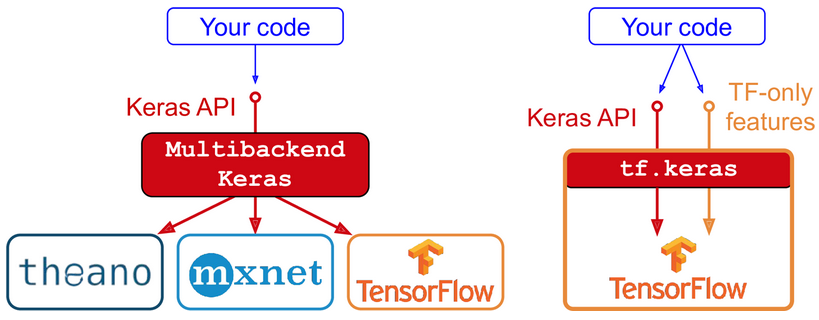

We will use *tf.keras*

In [4]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


We will use Fashion MNIST

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape      # 60000 greyscale images 28 x 28

(60000, 28, 28)

Scaling pixels to range 0-1 

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

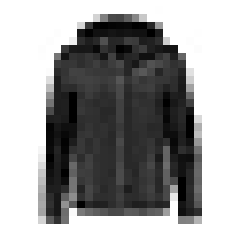

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

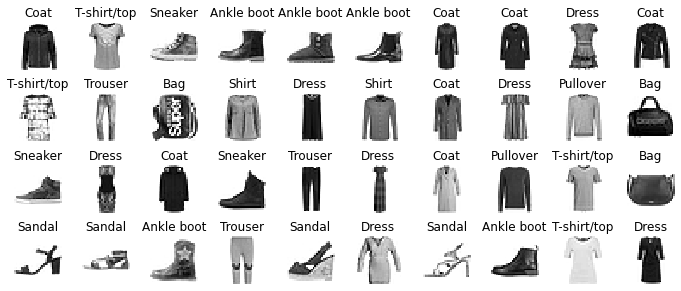

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

## Creating the model

### MLP Classifier

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers

Weights

In [24]:
hidden1 = model.layers[1]

weights, biases = hidden1.get_weights()
weights

array([[-0.03648796,  0.03648248, -0.03034535, ..., -0.02381232,
        -0.00725313,  0.05723633],
       [ 0.06085904, -0.0699233 , -0.03224907, ..., -0.05600949,
        -0.03852092,  0.03310139],
       [ 0.0138924 , -0.04291363,  0.05413282, ...,  0.0410149 ,
        -0.01687342,  0.0014627 ],
       ...,
       [-0.05986969, -0.02174253,  0.03653948, ...,  0.07301123,
         0.02677695,  0.0646729 ],
       [-0.0535876 ,  0.03568652, -0.0360527 , ...,  0.00787373,
         0.06653459,  0.06788562],
       [ 0.06703502, -0.00443842,  0.06620397, ..., -0.02757954,
        -0.02300546,  0.05938216]], dtype=float32)

Weights are initialized randomly

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

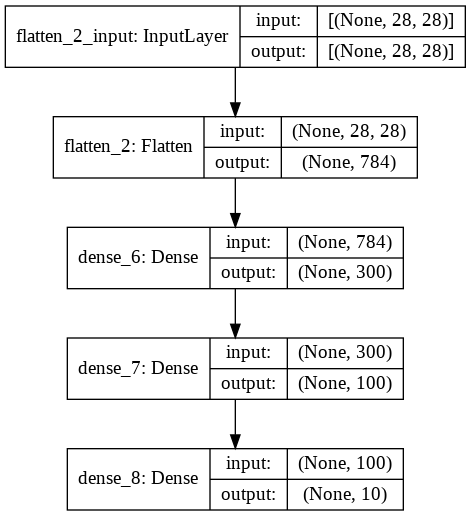

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2239 - accuracy: 0.9200 - val_loss: 0.2934 - val_accuracy: 0.8964
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2189 - accuracy: 0.9212 - val_loss: 0.2991 - val_accuracy: 0.8932
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2159 - accuracy: 0.9230 - val_loss: 0.3011 - val_accuracy: 0.8866
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2130 - accuracy: 0.9240 - val_loss: 0.2933 - val_accuracy: 0.8942
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2077 - accuracy: 0.9261 - val_loss: 0.2931 - val_accuracy: 0.8924
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2054 - accuracy: 0.9267 - val_loss: 0.3623 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2027 - accuracy: 0.9276 - val_loss: 0.2890 - val_accuracy:

Plotting data using the History dictionary

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


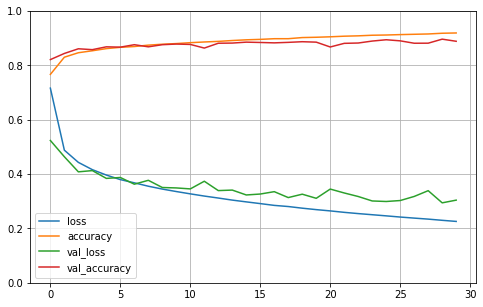

In [32]:
import pandas as pd

print(history.history.keys())
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

Evaluate the model

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8882


[0.3307740390300751, 0.8881999850273132]

Make prediction with the model (use the first 3 values of the test set)

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

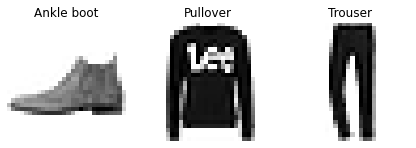

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### MLP Regressor

In [45]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Building the model

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7365 - val_loss: 1.1610
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8805 - val_loss: 0.7272
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6820 - val_loss: 0.6350
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.5928
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6125 - val_loss: 0.5592
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5490 - val_loss: 0.5303
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5531 - val_loss: 0.5060
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4864
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4925 - val_loss: 0.4703
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4853 - val_loss: 0.4577

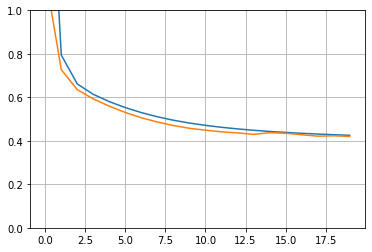

In [49]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
y_pred

array([[0.59437835],
       [1.6338603 ],
       [3.500274  ]], dtype=float32)

## Wide & Deep

In [51]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           930         dense_15[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_16[0][0]               

### Saving models

In [53]:
model.save("my_keras_model.h5")

Load the model with 

In [54]:
model = keras.models.load_model("my_keras_model.h5")

Save weights

In [55]:
model.save_weights("my_keras_weights.ckpt")

In [56]:
model.load_weights("my_keras_weights.ckpt")